<a href="https://colab.research.google.com/github/vincimech010233/QuantumComputingJourney-/blob/main/qiskit_RealAmplitudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install pennylane qiskit qiskit_aer

In [46]:
import qiskit_aer
from qiskit.circuit.library import RealAmplitudes
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RealAmplitudes
from qiskit import transpile, QuantumCircuit, ClassicalRegister
from qiskit.visualization import plot_histogram

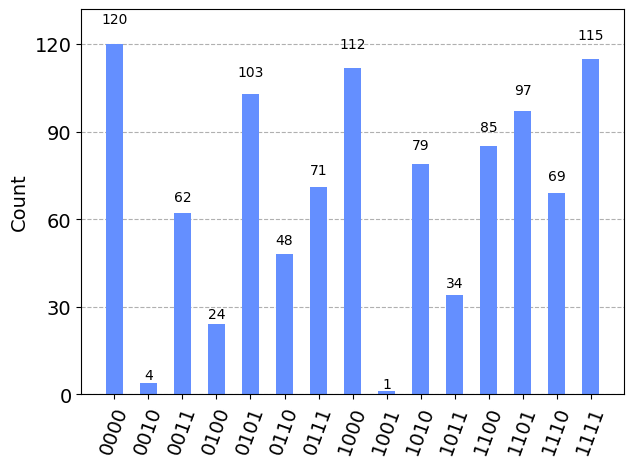

In [47]:
def lab2_ex1():
    # Definir el circuito cuántico parametrizado usando RealAmplitudes
    num_qubits = 4
    entanglement = 'linear'
    reps = 3

    # Crear un objeto QuantumCircuit basado en RealAmplitudes
    ansatz = RealAmplitudes(num_qubits, reps=reps, entanglement=entanglement)
    qc = QuantumCircuit(num_qubits)
    qc.compose(ansatz, inplace=True)

    # Añadir un registro clásico para las medidas
    cr = ClassicalRegister(num_qubits)
    qc.add_register(cr)

    # Añadir operaciones de medida
    qc.measure(list(range(num_qubits)), list(range(num_qubits)))

    return qc

def run_simulation(qc):
    # Preparar el backend del simulador
    backend_sim = AerSimulator()

    # Generar un conjunto de parámetros de ejemplo para enlazar al circuito
    parameters = list(qc.parameters)
    parameter_values = [0.5] * len(parameters)  # Ejemplo de asignación de valores a parámetros

    # Enlazar los valores de los parámetros al circuito
    qc_bound = qc.assign_parameters(parameter_values)

    # Transpilar el circuito para el simulador específico
    transpiled_qc = transpile(qc_bound, backend_sim)

    # Ejecutar la simulación
    job_sim = backend_sim.run(transpiled_qc, shots=1024)
    result_sim = job_sim.result()
    counts_ideal = result_sim.get_counts(transpiled_qc)

    return counts_ideal

# Ejecutar el circuito y obtener los resultados de la simulación
qc = lab2_ex1()
counts_ideal = run_simulation(qc)

# Visualizar el histograma de la simulación ideal
plot_histogram(counts_ideal)